# **Yapay Sinir Ağları (ANN) ile Rakam Tanıma**

1 ) İş Problemi (Businesss Problem)

2 ) Veri Anlamak (Data Understanding)

3 ) Veriyi Hazırlamak (Data Preparation)

4 ) Modelleme (Modeling)

5 ) Değerlendirme (Evaluation)


In [47]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings("ignore")

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
print("Eğitim Seti Boyutu", x_train.shape, y_train.shape)
print("Test Seti Boyutu", x_test.shape, y_test.shape)

Eğitim Seti Boyutu (60000, 28, 28) (60000,)
Test Seti Boyutu (10000, 28, 28) (10000,)


In [50]:
num_labels = len(np.unique(y_train))
print("Etiket Sayısı", num_labels)

Etiket Sayısı 10


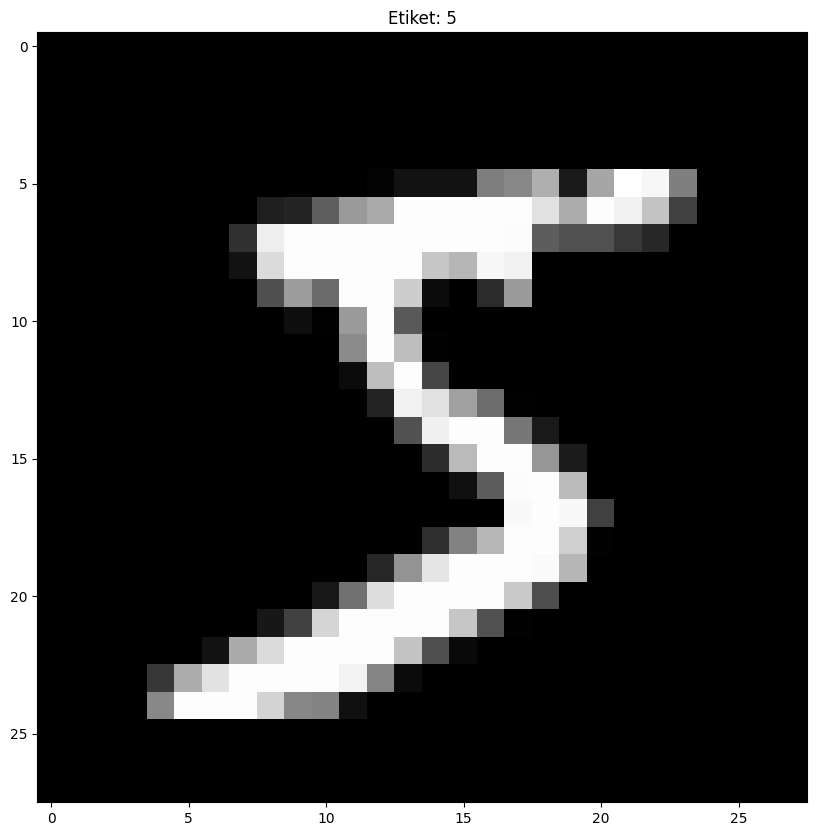

In [51]:
# Veri setinden örnekler gösterilmesi

plt.figure(figsize=(10, 10))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Etiket: {y_train[0]}")
plt.show()

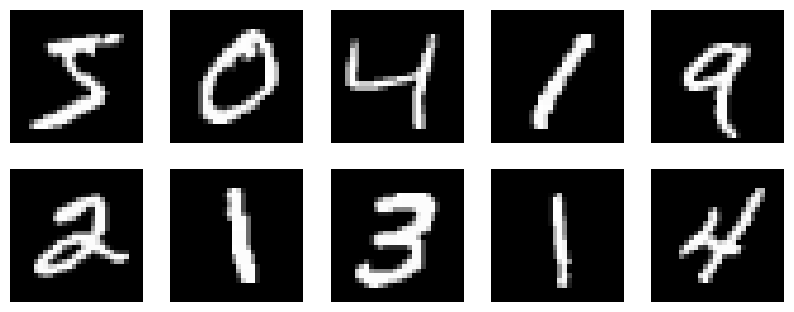

In [52]:
plt.figure(figsize=(10, 10))
for n in range(10):
    plt.subplot(5, 5, n+1)
    plt.imshow(x_train[n], cmap='gray')
    plt.axis('off')
plt.show()

In [53]:
# Yukarıda yaptığımız görselleştirme işlemini fonksiyon olarak tanımladık

def visualize_img(data):
    plt.figure(figsize=(10, 10))
    for n in range(10):
        plt.subplot(5, 5, n+1)
        plt.imshow(data[n], cmap='gray')
        plt.axis('off')

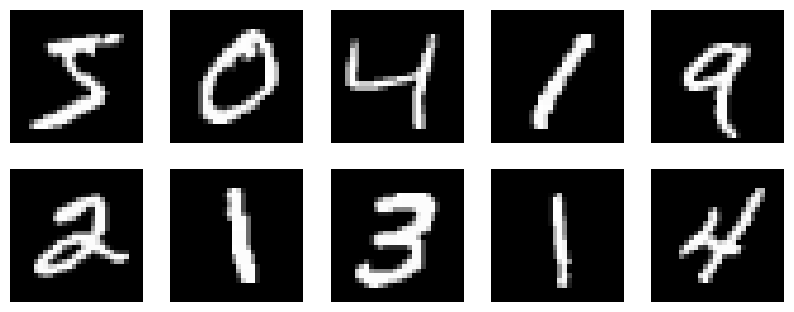

In [54]:
visualize_img(x_train)

In [55]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [56]:
x_train[2].shape

(28, 28)

In [57]:
x_train[2][10,10]

0

In [58]:
x_train[2][14,10]

49

In [59]:
x_train[2].mean()

24.799744897959183

In [60]:
x_train[2].sum()

19443

In [61]:
x_train[2][14:20,10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [62]:
x_train[2][14:20,10:20].mean()

96.51666666666667

In [63]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy=(y,x),color = 'white' if img[x][y] < threshold else 'black')

  plt.show()

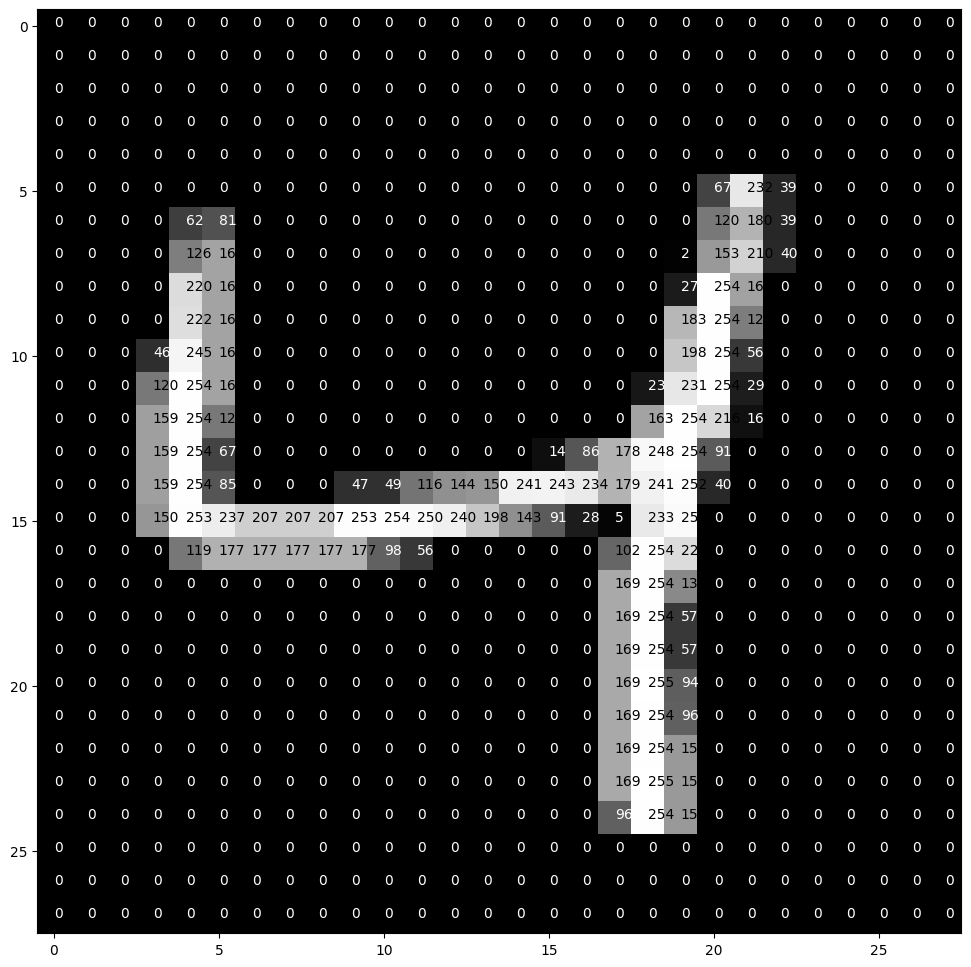

In [64]:
pixel_visualize(x_train[2])

Bu Python kodu, bir görüntüdeki her bir pikselin değerini görselleştiren bir fonksiyon oluşturur. İşte adım adım açıklaması:

### Kod Açıklaması:

1. **Fonksiyon Tanımlaması:**
   ```python
   def pixel_visualize(img):
   ```
   Bu satır, `pixel_visualize` adlı bir fonksiyon tanımlar ve bir parametre (`img`) alır. Bu parametre, gri tonlamalı bir görüntü (2D numpy array) olmalıdır.

2. **Grafik Figürü Oluşturma:**
   ```python
   fig = plt.figure(figsize=(12,12))
   ax = fig.add_subplot(111)
   ```
   - `plt.figure(figsize=(12,12))`: 12x12 boyutlarında bir grafik figürü oluşturur.
   - `fig.add_subplot(111)`: Bu figür üzerine tek bir grafik alanı (subplot) ekler.

3. **Görüntünün Görselleştirilmesi:**
   ```python
   ax.imshow(img, cmap='gray')
   ```
   - `ax.imshow(img, cmap='gray')`: Görüntüyü (`img`) gri tonlamalı (`cmap='gray'`) olarak grafikte görüntüler.

4. **Görüntü Boyutlarının Alınması:**
   ```python
   width, height = img.shape
   ```
   - Bu satır, `img` görüntüsünün genişliğini (`width`) ve yüksekliğini (`height`) alır.

5. **Eşik Değerinin Hesaplanması:**
   ```python
   threshold = img.max() / 2.5
   ```
   - Görüntüdeki maksimum piksel değerinin 2.5'e bölünmesiyle bir eşik değeri (`threshold`) hesaplanır. Bu eşik değeri, her bir pikselin üzerine yazılacak metnin rengini belirlemede kullanılır.

6. **Piksel Değerlerinin Üzerine Yazılması:**
   ```python
   for x in range(width):
       for y in range(height):
           ax.annotate(str(round(img[x][y],2)), xy=(y,x),color = 'white' if img[x][y] < threshold else 'black')
   ```
   - Bu döngü, her bir piksel için çalışır. `x` ve `y` değişkenleri sırasıyla pikselin genişlik ve yükseklik koordinatlarını temsil eder.
   - `ax.annotate`: Her bir pikselin değerini, `str(round(img[x][y],2))` formatında görüntü üzerinde gösterir.
     - `round(img[x][y], 2)`: Piksel değerini iki ondalık basamağa yuvarlar.
     - `color = 'white' if img[x][y] < threshold else 'black'`: Pikselin üzerine yazılacak metnin rengi, piksel değerinin eşik değerinden küçük olup olmadığına bağlı olarak beyaz (`white`) veya siyah (`black`) olarak belirlenir.

7. **Grafiğin Gösterilmesi:**
   ```python
   plt.show()
   ```
   - `plt.show()`: Grafik figürünü ekranda görüntüler.

### Özet:

Bu fonksiyon, verilen gri tonlamalı bir görüntüyü alır ve her bir pikselin değerini görüntü üzerinde gösterir. Piksel değerlerine göre metin rengi otomatik olarak ayarlanır, böylece her pikselin değeri daha iyi görülebilir.



---



In [65]:
# Encoding

In [66]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [67]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [68]:
# Reshape (Yeniden Şekillendirme)

In [69]:
image_size = x_train.shape[1]

In [70]:
image_size

28

In [71]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [72]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


In [73]:
# 1 ==>>> 28 * 28 = 784 tane pikselde tutulan bilgiyi ifade ediyor

In [74]:
# Standardizasyon

In [75]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

**Modelleme**

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(units=128, activation='relu', name='layer1'),
    tf.keras.layers.Dense(units=num_labels, activation='softmax', name='output_layer')
])


model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])


In [77]:
#    tf.keras.layers.Dense(units = 128, activation = 'relu', name = 'layer1'),                   # burası gizli katmanımız. 1. katman => bu katmanın içerisinde 128 nöron var -  aktivasyon fonk => relu
#    tf.keras.layers.Dense(units = num_labels, activation='softmax', name='output_layer')])      # burası ise çıkış katmanımız. son katman (çıkış katmanımızda 10 nöran var == num_labels)


In [78]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# 784 * 128 YAKLAŞIK 100480
# 128 * 10 = 1280 + 10 (BAYES DEĞERİ) => 1290

In [80]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8267 - loss: 0.6233 - precision_1: 0.9303 - recall_1: 0.7030 - val_accuracy: 0.9414 - val_loss: 0.1984 - val_precision_1: 0.9554 - val_recall_1: 0.9306
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9480 - loss: 0.1850 - precision_1: 0.9624 - recall_1: 0.9367 - val_accuracy: 0.9579 - val_loss: 0.1445 - val_precision_1: 0.9658 - val_recall_1: 0.9498
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9638 - loss: 0.1277 - precision_1: 0.9727 - recall_1: 0.9560 - val_accuracy: 0.9630 - val_loss: 0.1204 - val_precision_1: 0.9717 - val_recall_1: 0.9575
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9731 - loss: 0.0958 - precision_1: 0.9796 - recall_1: 0.9679 - val_accuracy: 0.9700 - val_loss: 0.0977 - val_precision_1: 0.9750 - val_recall_1: 0.9656
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9787 - loss: 0.0770 - precision_1: 0.9831 - recall_1: 0.9743 -

In [81]:
# epochs sayısı ==> kaç tur atmam lazım - kaç defa optimizasyon işlemi yapmamız lazım anlamına geliyor

469 sayısı, eğitim sırasında modelin kaç adımda bir epoch'u tamamladığını gösterir.

### Açıklama:
- **Epoch:** Tüm eğitim verilerinin model üzerinden bir kez geçirilmesi işlemi. Bir epoch, eğitim verilerinin bir tam döngüsünü temsil eder.
- **469/469:** Bu sayı, eğitim verilerinin toplam 469 mini-batch'e bölündüğünü ve her bir epoch sırasında modelin 469 adımda tüm veriyi işlediğini gösterir.

Özetle, 469 sayısı, modelin her epoch'ta kaç mini-batch işlediğini belirtir. Bu örnekte 469 batch, modelin tüm eğitim verisini bir epoch içinde işlemesi için gereken adım sayısıdır.

**Model Başarısını Değerlendirme**

In [82]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9935 - loss: 0.0264 - precision_1: 0.9946 - recall_1: 0.9922 - val_accuracy: 0.9799 - val_loss: 0.0670 - val_precision_1: 0.9819 - val_recall_1: 0.9784
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9956 - loss: 0.0202 - precision_1: 0.9962 - recall_1: 0.9947 - val_accuracy: 0.9799 - val_loss: 0.0688 - val_precision_1: 0.9818 - val_recall_1: 0.9786
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9958 - loss: 0.0182 - precision_1: 0.9965 - recall_1: 0.9953 - val_accuracy: 0.9791 - val_loss: 0.0702 - val_precision_1: 0.9807 - val_recall_1: 0.9779
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9970 - loss: 0.0147 - precision_1: 0.9974 - recall_1: 0.9964 - val_accuracy: 0.9800 - val_loss: 0.0674 - val_precision_1: 0.9817 - val_recall_1: 0.9787
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9972 - loss: 0.0145 - precision_1: 0.9974 - recall_1: 0.9966 -

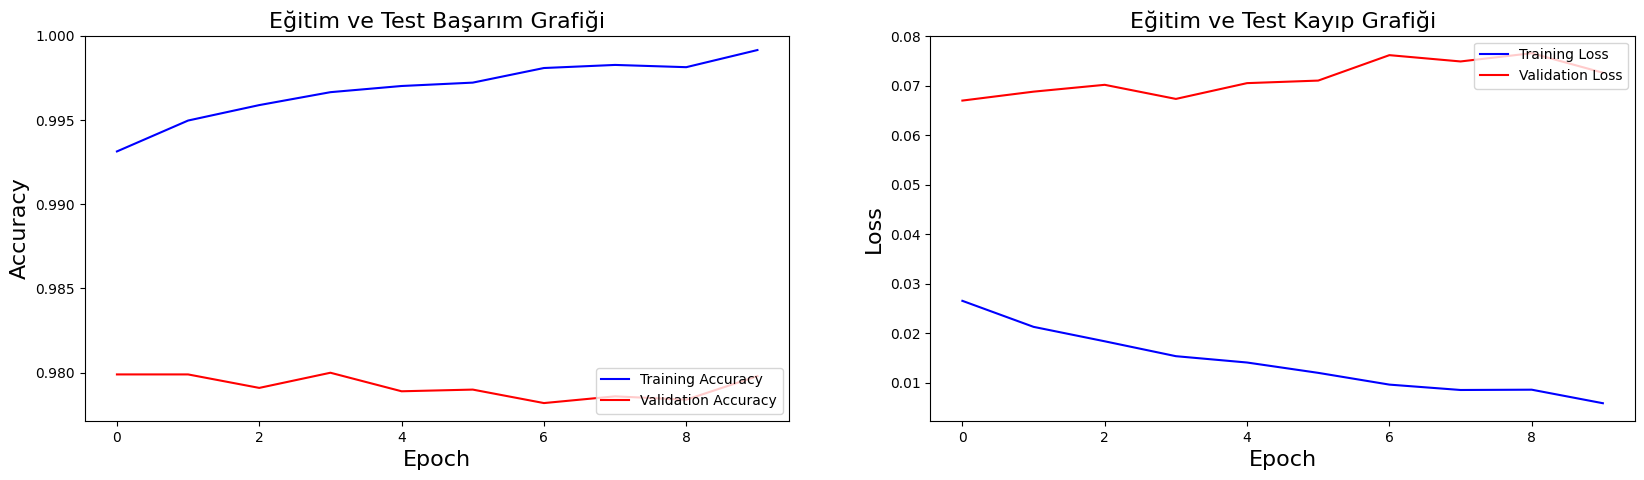

In [83]:
# Accuracy ve Loss Grafikleri

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color = 'b' , label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color = 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize = 16)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], color = 'b', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'r', label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize = 16)
plt.show()

Bu Python kodu, bir derin öğrenme modelinin eğitim süreci boyunca elde edilen başarımları ve kayıpları görselleştiren iki grafik oluşturur. Aşağıda adım adım kodun ne yaptığını açıklıyorum:

### Genel Bakış:
- **`history`**: Modelin eğitim süreci boyunca toplanan metriklerin (accuracy, loss, vb.) saklandığı bir nesnedir. `history.history` özelliği, bu metriklerin bir sözlüğünü içerir.

### Kodun Adım Adım Açıklaması:

1. **Grafik Boyutunun Ayarlanması:**
   ```python
   plt.figure(figsize=(20,5))
   ```
   - Grafiğin boyutları ayarlanır. `figsize=(20,5)` ifadesi, grafiğin 20 birim genişliğinde ve 5 birim yüksekliğinde olmasını sağlar.

2. **Birinci Alt Grafik (Eğitim ve Doğrulama Başarımı):**
   ```python
   plt.subplot(1,2,1)
   ```
   - Bu kod, ilk alt grafiği oluşturur. `1,2,1` parametreleri, 1 satır ve 2 sütundan oluşan bir grafik düzeni belirler ve bu düzenin ilk grafiği aktif hale getirilir.

   - **Eğitim ve Doğrulama Başarımının Çizilmesi:**
     ```python
     plt.plot(history.history['accuracy'], color = 'b' , label = 'Training Accuracy')
     plt.plot(history.history['val_accuracy'], color = 'r', label='Validation Accuracy')
     ```
     - Eğitim (Training) ve doğrulama (Validation) setlerinde elde edilen doğruluk (accuracy) değerleri çizilir. Mavi (`b`) renk eğitim başarımı için, kırmızı (`r`) renk ise doğrulama başarımı için kullanılır.

   - **Grafik Ayarları:**
     ```python
     plt.legend(loc='lower right')
     plt.xlabel('Epoch', fontsize=16)
     plt.ylabel('Accuracy', fontsize = 16)
     plt.ylim([min(plt.ylim()),1])
     plt.title('Eğitim ve Test Başarım Grafiği', fontsize = 16)
     ```
     - **Legend (Açıklama):** Grafikteki çizgilerin neyi temsil ettiğini göstermek için sağ alt köşede (`lower right`) bir açıklama eklenir.
     - **X ve Y Eksenleri:** X ekseni "Epoch" olarak, Y ekseni "Accuracy" (başarım) olarak etiketlenir.
     - **Y Ekseninin Sınırları:** Y ekseninin alt sınırı mevcut minimum değerde, üst sınırı ise 1 olarak ayarlanır.
     - **Başlık:** Bu alt grafik için başlık "Eğitim ve Test Başarım Grafiği" olarak belirlenir.

3. **İkinci Alt Grafik (Eğitim ve Doğrulama Kayıpları):**
   ```python
   plt.subplot(1,2,2)
   ```
   - Bu kod, ikinci alt grafiği oluşturur. `1,2,2` parametreleri, 1 satır ve 2 sütundan oluşan grafik düzeninde ikinci grafiği aktif hale getirir.

   - **Eğitim ve Doğrulama Kayıplarının Çizilmesi:**
     ```python
     plt.plot(history.history['loss'], color = 'b', label = 'Training Loss')
     plt.plot(history.history['val_loss'], color = 'r', label = 'Validation Loss')
     ```
     - Eğitim (Training) ve doğrulama (Validation) setlerindeki kayıp (loss) değerleri çizilir. Mavi (`b`) renk eğitim kaybı için, kırmızı (`r`) renk ise doğrulama kaybı için kullanılır.

   - **Grafik Ayarları:**
     ```python
     plt.legend(loc = 'upper right')
     plt.xlabel('Epoch', fontsize = 16)
     plt.ylabel('Loss', fontsize = 16)
     plt.title('Eğitim ve Test Kayıp Grafiği', fontsize = 16)
     ```
     - **Legend (Açıklama):** Bu alt grafikteki çizgilerin neyi temsil ettiğini göstermek için sağ üst köşede (`upper right`) bir açıklama eklenir.
     - **X ve Y Eksenleri:** X ekseni "Epoch" olarak, Y ekseni "Loss" (kayıp) olarak etiketlenir.
     - **Başlık:** Bu alt grafik için başlık "Eğitim ve Test Kayıp Grafiği" olarak belirlenir.

4. **Grafiğin Gösterimi:**
   ```python
   plt.show()
   ```
   - Tüm grafiklerin ekranda gösterilmesini sağlar.

### Özet:
Bu kod, modelin eğitim sürecindeki doğruluk (accuracy) ve kayıp (loss) metriklerini hem eğitim hem de doğrulama setleri üzerinde görselleştirir. Bu grafikler, modelin eğitim süreci boyunca nasıl performans gösterdiğini analiz etmek için kullanılır. Eğer eğitim ve doğrulama metrikleri arasında büyük bir fark varsa, bu modelin aşırı öğrenme (overfitting) veya yetersiz öğrenme (underfitting) sorunları yaşayıp yaşamadığını anlamak için yardımcı olabilir.

In [84]:
loss, precison, recall, acc = model.evaluate(x_test, y_test, verbose = False)
print("\nTest Accuracy : %.1f%%" % (100 * acc))
print("\nTest Loss : %.1f%%" % (100 * loss))
print("\nTest Precision : %.1f%%" % (100 * precison))
print("\nTest Recall : %.1f%%" % (100 * recall))


Test Accuracy : 98.0%

Test Loss : 7.3%

Test Precision : 98.1%

Test Recall : 97.9%


Bu sonuçlar, bir modelin test verisi üzerinde elde ettiği performans ölçümlerini gösterir. Her bir metriği ayrıntılı olarak açıklayalım:

### 1. **Test Accuracy (Başarım Oranı): 98.0%**
   - **Açıklama:** Modelin test verisi üzerinde doğru sınıflandırdığı örneklerin oranıdır. %98.0, modelin test verisinin %98'inde doğru tahminlerde bulunduğunu gösterir.
   - **Önem:** Yüksek bir doğruluk oranı, modelin genel olarak iyi performans gösterdiğini, test verisinin büyük çoğunluğunu doğru sınıflandırdığını ifade eder.

### 2. **Test Loss (Kayıp Değeri): 7.3%**
   - **Açıklama:** Kayıp fonksiyonu, modelin tahminlerinin ne kadar hatalı olduğunu ölçer. Kayıp değeri, modelin yaptığı hataların ortalama bir ölçüsüdür. Bu durumda, kayıp %7.3 olarak belirtilmiştir.
   - **Önem:** Kayıp değeri, modelin ne kadar iyi öğrendiğinin bir göstergesidir. Daha düşük kayıp değerleri, modelin daha iyi bir performansa sahip olduğunu gösterir. Kayıp değerinin yüksek olması, modelin hatalı tahminler yaptığını ve iyileştirilmesi gerektiğini gösterebilir.

### 3. **Test Precision (Kesinlik Oranı): 98.1%**
   - **Açıklama:** Kesinlik (precision), modelin pozitif olarak sınıflandırdığı örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. %98.1, modelin pozitif tahminlerinin %98.1'inin doğru olduğunu ifade eder.
   - **Önem:** Yüksek kesinlik, modelin yanlış pozitifleri minimize ettiğini, yani gerçek olmayan pozitif tahminlerde bulunmadığını gösterir. Kesinlik, özellikle yanlış pozitiflerin maliyetli olduğu durumlarda önemlidir.

### 4. **Test Recall (Duyarlılık Oranı): 97.9%**
   - **Açıklama:** Duyarlılık (recall), modelin gerçekten pozitif olan örnekleri ne kadar doğru şekilde tespit ettiğini gösterir. %97.9, modelin tüm pozitif örneklerin %97.9'unu doğru bir şekilde tespit ettiğini ifade eder.
   - **Önem:** Yüksek duyarlılık, modelin pozitif örnekleri kaçırmadığını gösterir. Recall, özellikle pozitif örneklerin gözden kaçırılmasının maliyetli olduğu durumlarda önemlidir.

### Genel Değerlendirme:
Bu sonuçlar, modelin test verisi üzerinde oldukça iyi performans gösterdiğini, yani veriyi büyük ölçüde doğru şekilde sınıflandırdığını ve önemli ölçüde doğru tahminlerde bulunduğunu göstermektedir. Precision ve recall oranlarının birbirine yakın ve yüksek olması, modelin hem yanlış pozitifleri hem de yanlış negatifleri minimize ettiğini gösterir. Bu, modelin dengeli bir performansa sahip olduğuna işaret eder.

In [86]:
model.save("mnist_ann_model.h5")

In [87]:
import random

random = random.randint(0, x_test.shape[0])

In [88]:
random

1601

In [89]:
test_image = x_test[random]

In [90]:
test_image

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [91]:
y_test[random]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

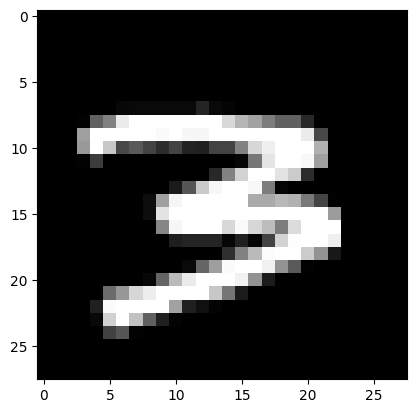

In [92]:
plt.imshow(test_image.reshape(28, 28), cmap='gray')

In [94]:
test_data = x_test[random].reshape(1, 28, 28, 1)

In [95]:
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [96]:
probability

array([[1.5397063e-16, 1.7373424e-10, 8.6343607e-07, 9.9183685e-01,
        1.3501247e-11, 3.0690795e-14, 1.1069300e-15, 8.1623234e-03,
        6.1171073e-12, 1.4636707e-09]], dtype=float32)

In [97]:
predicted_classes = np.argmax(probability)

In [98]:
predicted_classes

3

In [101]:
print(f"Tahmin Edilen Sınıf : {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri {(np.max(probability, axis = -1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri : \n {probability}")

Tahmin Edilen Sınıf : 3 

Tahmin Edilen Sınıfın Olasılık Değeri 0.9918368458747864 

Diğer Sınıfların Olasılık Değerleri : 
 [[1.5397063e-16 1.7373424e-10 8.6343607e-07 9.9183685e-01 1.3501247e-11
  3.0690795e-14 1.1069300e-15 8.1623234e-03 6.1171073e-12 1.4636707e-09]]


Bu kod bloğu, eğitilmiş bir yapay sinir ağı modelini kullanarak rastgele bir test verisi örneği üzerinde tahmin yapmaktadır. Aşağıda adım adım ne yapıldığını açıklayalım:

### 1. **Test Verisinin Hazırlanması:**

```python
test_data = x_test[random].reshape(1, 28, 28, 1)
```

- **Açıklama:** `x_test` adlı test veri kümesinden rastgele (`random` indeksi ile) bir örnek seçilir ve `test_data` değişkenine atanır. Seçilen bu test verisi örneği, modelin tahmin yapabilmesi için yeniden şekillendirilir.
  - `reshape(1, 28, 28, 1)`: Veri 28x28 boyutunda bir görüntü (1 kanal, yani gri tonlamalı) olarak yeniden şekillendirilir. `1` değeri, modelin tek bir örnek üzerinde çalışacağını belirtir (batch size olarak da düşünebilirsiniz).

### 2. **Tahmin Yapılması:**

```python
probability = model.predict(test_data)
```

- **Açıklama:** `model.predict()` fonksiyonu kullanılarak, modelin bu test verisi üzerinde tahminde bulunması sağlanır. Bu tahminin sonucu, `probability` değişkenine atanır. Bu sonuç, modelin her sınıf için hesapladığı olasılıkları içerir.

### 3. **Tahmin Edilen Sınıfın Bulunması:**

```python
predicted_classes = np.argmax(probability)
```

- **Açıklama:** `np.argmax(probability)` fonksiyonu, olasılık değerleri arasında en yüksek olasılığa sahip sınıfı belirler. Bu sınıfın indeksi `predicted_classes` değişkenine atanır. Yani, modelin bu görüntünün hangi sınıfa ait olduğunu tahmin ettiği sınıf bulunur.

### 4. **Sonuçların Yazdırılması:**

```python
print(f"Tahmin Edilen Sınıf : {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri {(np.max(probability, axis = -1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri : \n {probability}")
```

- **Açıklama:** Bu kod parçaları, tahmin edilen sınıfı, bu sınıfa ait olasılık değerini ve diğer sınıflara ait olasılıkları ekrana yazdırır.
  - `Tahmin Edilen Sınıf`: Modelin tahmin ettiği sınıfın indeksi yazdırılır.
  - `Tahmin Edilen Sınıfın Olasılık Değeri`: Bu sınıfa ait olasılık değeri yazdırılır, yani modelin bu sınıfın doğru olduğu konusundaki güveni.
  - `Diğer Sınıfların Olasılık Değerleri`: Modelin her sınıf için hesapladığı olasılık değerlerinin tamamı yazdırılır. Bu, modelin bu veri örneğinin hangi sınıfa ait olduğuna dair diğer olasılıkları gösterir.

### Özet:
Bu kod bloğu, bir yapay sinir ağı modeli kullanarak bir test veri örneği üzerinde tahmin yapıyor. Tahmin edilen sınıfı ve bu sınıfa ait olasılık değerini ekrana yazdırarak modelin nasıl tahmin yaptığını ve bu tahminin güven derecesini göstermektedir.